# Predicting Car Prices Using K-Nearest Neighors 

## Introduction

- On this project, we'll predict a car's market price with a machine learning algorithm: K-Nearest Neighbors. 
- Our main public is car stores.
- The K-Nearest Neighbors algorithm (KNN) is a supervisioned, non-linear and non-parametric model (it doesn't have any fixed numbers of parameters in the model). It's also known as a lazy code because it doesn't learn from the training data in the training phase, only in the testing phase.
- As we want to predict the car prices (continuous variable) we'll use the regression type. This algorithm works as follows:
    1) Compute the Euclidean distance (or Mahalanobis distance) from the query example to the labeled examples;
    2) Order the labeled examples by increasing distance;
    3) Find a number of neighbors (K);
    4) Calculate an inverse distance weighted average with the k-nearest multivariate neighbors.

## Introduction to the data
- We'll use a dataset with various cars and their attributes, like fuel type, number of doors and price. The dataset can be downloaded at the UCI Machine Learning [repository](https://archive.ics.uci.edu/ml/datasets/automobile). In this site, there is also a list of attribute informations, explaining more the data. The data was donated by Jeffrey C. Schlimmer.
- The dataset has 205 rows and 26 columns.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import seaborn as sns
import operator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

- As the dataset doesn't have a header, we'll write the column names based on the documentation.

In [2]:
# importing the dataset
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
           'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
           'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
           'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm',
           'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data', names=columns)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# checking values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

- Even though the .info() function didn't mentioned any missing value, we noticed in the "normalized_losses" column the "?" symbol.  

In [4]:
cars['normalized_losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized_losses, dtype: int64

## Exploratory Data Analysis (EDA)
- On this section, we'll explore our dataset to know it better and get insights to process the model.

### 1. Description of the data
- Our dataset has 201 rows and 26 columns, but to use as features, we only need the numeric columns. Based on the dataset documentation, we get 15 columns: 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price' (our target column).

In [5]:
# selecting only the columns with continuous values
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                          'engine_size', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 
                          'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### 2. Handling missing values
- Now, we'll replace the "?" with NaN value. To process the KNN algorithm, we can't have missing values, so we'll remove the rows with missing values of our target column "price", then fill the other columns with the mean.

In [6]:
# replacing the ? with NaN
numeric_cars = numeric_cars.replace('?', np.nan)

# transforming into float type
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

# removing rows with NaN in the target column
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    float64
 1   wheel_base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb_weight        201 non-null    float64
 6   engine_size        201 non-null    float64
 7   bore               197 non-null    float64
 8   stroke             197 non-null    float64
 9   compression_rate   201 non-null    float64
 10  horsepower         199 non-null    float64
 11  peak_rpm           199 non-null    float64
 12  city_mpg           201 non-null    float64
 13  highway_mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


In [7]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

- Next, we are going to use the describe function to get the principal stats of the dataset.

In [8]:
numeric_cars.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


- About our target column, "price", we can highlight the mean (13207,13), the std (7949,07) the minimum (5118) and the maximum (45400) values.

### 3. Checking outliers
- As KNN is sensitive to the noise in the dataset and outlier. If "K" value is low, the model is susceptible to outliers, if "K" value is high, the model is robust to outliers. Let's check in our columns if there is an outstanding value. 
- We'll use the IQR (Interquartile Range), which is the difference between the third (Q3) and first quartile (Q1). To be consider an outlier, a value must usually follow these equations:

![alt text](outliers.png)

In [9]:
# calculating IQR
Q1 = numeric_cars.quantile(0.25)
Q3 = numeric_cars.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

normalized_losses      36.00
wheel_base              7.90
length                 16.70
width                   2.50
height                  3.50
curb_weight           757.00
engine_size            43.00
bore                    0.43
stroke                  0.30
compression_rate        0.80
horsepower             46.00
peak_rpm              700.00
city_mpg               11.00
highway_mpg             9.00
price                8725.00
dtype: float64


In [10]:
# identifying outliers
numeric_cars_outliers = numeric_cars[(numeric_cars < (Q1 - 1.5*IQR)) | (numeric_cars > (Q3 + 1.5*IQR))]
print(numeric_cars_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  8 non-null      float64
 1   wheel_base         3 non-null      float64
 2   length             1 non-null      float64
 3   width              11 non-null     float64
 4   height             0 non-null      float64
 5   curb_weight        2 non-null      float64
 6   engine_size        10 non-null     float64
 7   bore               0 non-null      float64
 8   stroke             20 non-null     float64
 9   compression_rate   27 non-null     float64
 10  horsepower         5 non-null      float64
 11  peak_rpm           2 non-null      float64
 12  city_mpg           2 non-null      float64
 13  highway_mpg        3 non-null      float64
 14  price              14 non-null     float64
dtypes: float64(15)
memory usage: 25.1 KB
None


- We can see in our dataset that only two columns don't have outliers, "height" and "bore". The ones with most outlier values are: "compression_rate" with 27 of 201 (13,4%), "stroke" with 20 of 201 (10%), "price" with 14 of 201 (7%), "width" with 11 of 201 (5,4%) and "engine" with 10 of 201 (5%).
- Next, we'll investigate more these columns with the boxplot.

<AxesSubplot:xlabel='compression_rate'>

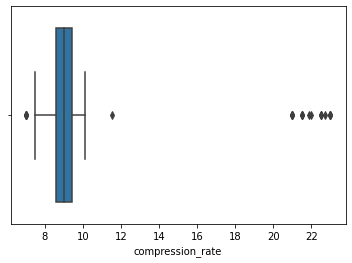

In [11]:
# checking compression_rate column
sns.boxplot(x=numeric_cars['compression_rate'])

<AxesSubplot:xlabel='stroke'>

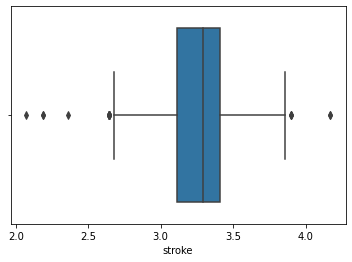

In [12]:
# checking stroke column
sns.boxplot(x=numeric_cars['stroke'])

<AxesSubplot:xlabel='price'>

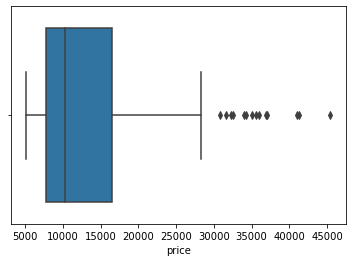

In [13]:
# checking price column
sns.boxplot(x=numeric_cars['price'])

<AxesSubplot:xlabel='width'>

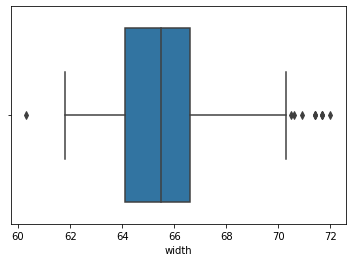

In [14]:
# checking width column
sns.boxplot(x=numeric_cars['width'])

<AxesSubplot:xlabel='engine_size'>

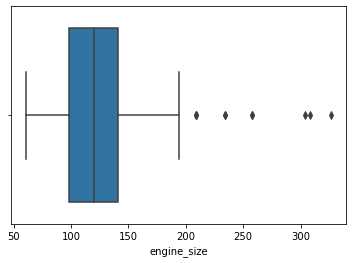

In [15]:
# checking engine_size column
sns.boxplot(x=numeric_cars['engine_size'])

- Observing the boxplots above, we can see  the column thathas more outlier values is "compression_rate", also with biggest the distance. The other columns have less than 10% of outlier values and these aren't so distant. The columns "width" and "stroke" have under and above average values. The columns "price" and "engine_size" have only above average values.

### 4. Bivariate analysis
- In this section, we are going to analise the relationships between the columns of our dataset. Let's begin with a heatmap with the correlation.

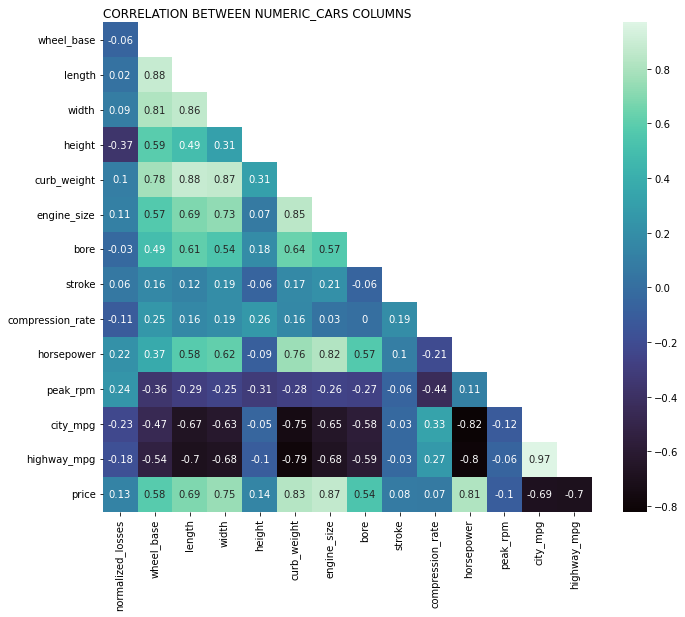

In [16]:
# creating the correlation matrix 
correlation_matrix = numeric_cars.corr().round(2)

# mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# adjusting mask and df
mask = mask[1:, :-1]
corr = correlation_matrix.iloc[1:,:-1].copy()

# figure and heatmap
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, annot=True, square=True, cmap='mako')

# title
title = 'correlation between numeric_cars columns'.upper()
plt.title(title, loc='left')

plt.show()

- Observing the heatmap above, we can highlight some values: 
    - Smallest correlations: 0 between "bore" and "compression_rate",
                             0.02 between "lenght" and "normalized_losses",
                             0.03 between "normalized_losses" and "bore",
                             0.03 between "compression_rate" and "engine_size",
                            -0.03 between "stroke" and "city_mpg",
                            -0.03 between "stroke" "highway_mpg";
    - Biggest correlations: 0.97 between "highway_mpg" and "city_mpg",
                            0.88 between "lenght" and "curb_weight",
                            0.88 between "wheel_base" and "lenght",
                            0.87 between "curb_weight" and "width",
                            0.87 between "price" and "engine_size",
                           -0.82 between "city_mpg" and "horsepower";
    - Between our target column "price":  0.87 with "engine_size",
                                         0.13 with "normalized_losses",
                                        -0.1 with "peak_rpm",
                                        -0.7 with "highway_mpg".

## Preprocessing the data
- Besides selecting the continuous variables and handling missing values, the implementation of the KNN algorith also require data scaling. 
- We'll normalize all columns to range from 0 to 1 except the target column "price".

In [17]:
# normalizing the columns except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [18]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Modeling

### 1. Train/Test Validation
#### 1.1 Univariate Model
- Now, we'll train the univariate model, using one column at a time. We'll create a function with three parameters, training column name, target column, and the dataframe object. This function randomize, split, instantiate, predict and calculate the RMSE, our chosen measure.
- The RMSE (Root Mean Squared Error) is the square root of the average of squared errors. The effect of each error on RMSE is proportional to the size of the squared error. RMSE is sensitive to outliers.

In [19]:
# creating a function to implement the univariate model
def knn_train_test(train_col, target_col, df):
    
    """Randomize, split, instantiate the model, fit, predict and calculate the RMSE.

    Args:
      train_col: the column used to train the model.
      target_col: the target column to be compared with the predictions.
      df: DataFrame used in the model.
      
    Returns:
      float.
    """
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # randomize the order of rows in DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # select the first half and set as training set.
    # select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# for each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# creating a Series object from the dictionary
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_rate     6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

- In this univariate model, using the default value for K (5), the column that got the best performance was "engine_size", followed by "horsepower". The ones with the biggest RMSE value were "height" and "stroke". 
- Next, we'll use a technique of hyperparameter optimization called grid serach, which envolves the variation of the K value and find the best performance.
- We'll modify the knn_train_test() function to accept a parameter for the k value.For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). 

In [20]:
def knn_train_test(train_col, target_col, df):
    
    """Randomize, split, instantiate the model with different k values, fit, predict and calculate 
       the RMSE.

    Args:
      train_col: the column used to train the model.
      target_col: the target column to be compared with the predictions.
      df: DataFrame used in the model.
      
    Returns:
      float.
    """
    
    np.random.seed(1)
        
    # randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # select the first half and set as training set.
    # select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# for each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


- To get a better visualization of these results, we'll create a graph with the K values and the RMSE of each column.

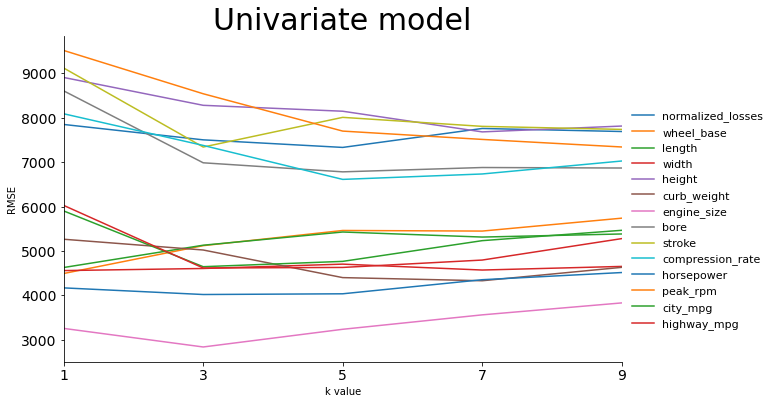

In [21]:
# crate a graph with the k values and the RMSE of k_rmse_results
plt.figure(figsize=(10,6))

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.title('Univariate model', fontsize=30)
    plt.xticks([1,3,5,7,9], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(1,9)
    plt.legend(train_cols, bbox_to_anchor=(1, 0.8), frameon=False, fontsize=11)
    sns.despine()

- The column with the lowest RMSE is still "engine_size", remember that it has a high correlation with the "price" column (+0.87).
- Observing the values from the columns with most outlier values, "compression_rate" and "stroke", we see a stabilization for the RMSE values with a K >= 5.
- Based on the graphic, we can separate the features in two groups:
    - Below 6000: "width", "lenght", "curb_weight", "city_mpg", "wheel_base", "highway_mpg", "horsepower" and "engine_size";
    - Above 6000: "peak_rpm", "height", "stroke", "bore", "compression_rate", "normalized_losses".

#### 1.2 Multivariate Model
- In this section, we'll modify the knn_train_test() function to accept a list of column names (instead of just a string). First, we'll use a the default k value (k=5) from scikit-learn. Then, we'll choose the best 2, 3, 4 and 5 features from the previous step to train and test a multivariate k-nearest neighbors.

In [22]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine_size          3346.484586
horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_rate     7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64


- The columns with lower average RMSE are will for our combination to the multivariate model:
    - 2 best features: "engine_size" and "horsepower";
    - 3 best features: "engine_size", "horsepower" and "width";
    - 4 best features: "engine_size", "horsepower", "width" and "curb_weight";
    - 5 best features: "engine_size", "horsepower", "width", "curb_weight" and "highway_mpg";
- Next, we'll modify the knn_train_test function to use these combined features to train and test the model.

In [23]:
def knn_train_test(train_cols, target_col, df):
    
      
    """Randomize, split, instantiate the model with different features and k=5, fit, predict and calculate 
       the RMSE.

    Args:
      train_cols: the column used to train the model.
      target_col: the target column to be compared with the predictions.
      df: DataFrame used in the model.
      
    Returns:
      float.
    """
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805}}

- By order, the model with lowest RMSE are:
    1º) 2 best features: "engine_size" and "horsepower" with 2949.88;
    2º) 5 best features: "engine_size", "horsepower", "width", "curb_weight" and "highway_mpg" with 3410.22;
    3º) 4 best features: "engine_size", "horsepower", "width" and "curb_weight" with 3487.34;
    4º) 3 best features: "engine_size", "horsepower" and "width" with 3580.74.
- Now, let's try different K values.

In [24]:
def knn_train_test(train_cols, target_col, df):
    
    """Randomize, split, instantiate the model with different features and k values, fit, predict and calculate 
       the RMSE.

    Args:
      train_cols: the column used to train the model.
      target_col: the target column to be compared with the predictions.
      df: DataFrame used in the model.
      
    Returns:
      float.
    """
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

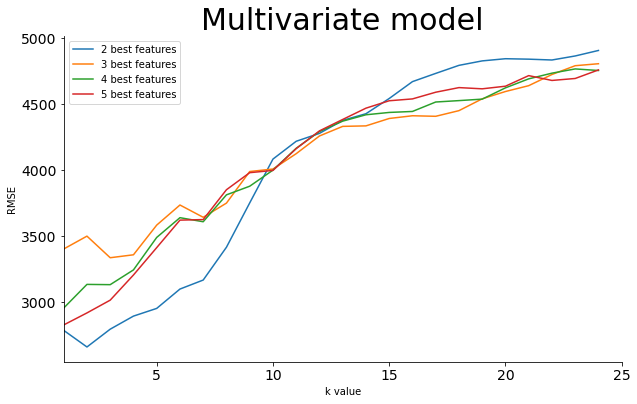

In [25]:
# crate a graph with the k values and the RMSE of k_rmse_results
plt.figure(figsize=(10,6))

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.xlabel('k value')
    plt.title('Multivariate model', fontsize=30)
    plt.legend()
    sns.despine()
    plt.xlim(1,25)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

- The 2 best features seems the best option for k values under 10. The other have their lowest RMSE with k = 1, except the 3 best features that have a minimum value with k = 3.
- We can see that when we increase the k value the error increases, but with a low value of k, the prediction is impacted by the noise.
- So far, our results were:
    - **Univariate**: "engine_size" - RMSE = 2840.56 (K=3)
                      "engine_Size" - RMSE = 3238.46 (K=5)
    - **Multivariate**: "engine_size" and "horsepower" - RMSE = 2657.80 (K=2)
                        "engine_size" and "horsepower" - RMSE = 2949.88 (K=5)
- The difference between all the RMSE is very low, a safer choice would be the second best multivariate model, with "engine_size" and "horsepower" columns and k=5.

## Conclusion
- On this project, we created a machine learning regression model based on K-Nearest Neighbors algorithm to predict car prices. In the EDA section, we selected the continuous values columns, handled missing values, detected outliers and checked the correlation between the columns. After that, we preprocessed the data normalizing the columns, except the target "price". Then, in the Modeling section, we used train/test validation to the univariate model and got "engine_size" - RMSE = 2840.56 (K=3) as best result. With the Multivariate model, we got "engine_size" and "horsepower" - RMSE = 2657.80 (K=2) and "engine_size" and "horsepower" - RMSE = 2949.88 (K=5) as best result. We choose the "engine_size" and "horsepower" - RMSE = 2949.88 (K=5) based on the the number of neighbors (K) and the features.
- Some advantages of using KNN regression algorithm: it is simple to understand and implement, it's non-parametrical nature can be useful, making kNN a great model for many machine learning use cases that don’t require highly complex techniques, and since the KNN algorithm does not require any training before making predictions as a result new data can be added seamlessly without impacting the accuracy of the algorithm.
- Some disavantages: because it is a lazy learner code, working with big data is computationally expensive, it also suffers from curse of dimensionality for higher dimensional data(d > 500), if we use euclidean distance measure which is quite common and it is s ensitive to noise and outliers.
- We can continue work on this model with some additional approaches to try to get a better performance, like: using K-Fold cross validation, removing the outliers and bagging.
- More about KNN can be found [here](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#k-NN_regression), [here](https://realpython.com/knn-python/), [here](https://becominghuman.ai/all-you-need-to-know-about-k-nn-machine-learning-algorithm-40c3ca45131e) and [here](https://www.analyticsvidhya.com/blog/2021/05/20-questions-to-test-your-skills-on-k-nearest-neighbour/).